# 第三章

## 激活函数

概念：将输入信号的总和转换为输出信号，这种函数一般称为**激活函数（activtion function）**。

NOTE：比如第二章中的代码，下面一块代码，就是激活函数要做的内容。

``` python
if temp<=0: 
    return 0 
else: 
    return 1
```

### 阶跃函数（step function）

概念：以阈值为界，一旦输入超过阈值，就切换输出。就如上面代码一样。

``` python

def step_fucntion(x):
    if x>0:
        return 1
    else:
        return 0

```

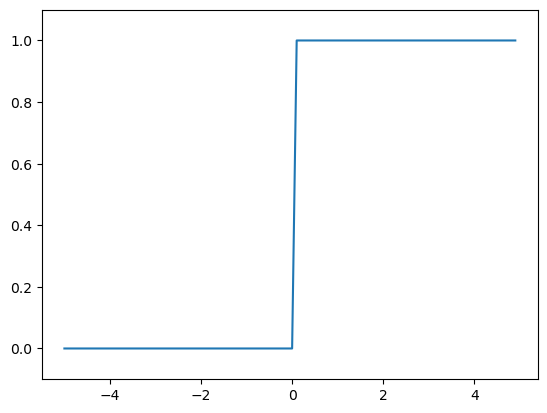

In [4]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    # x>0 会返回一个 true和false的np array， 再将值转换 false=0 , true =1
    return np.array(x>0, dtype=np.int16)

x = np.arange(-5, 5, 0.1)
y = step_function(x)
plt.plot(x, y)
# 指定y轴的范围
plt.ylim(-0.1, 1.1)
plt.show()

### sigmoid 函数

$h(x) = \frac{1}{1+exp(-x)}$

这个就是sigmoid的公式，exp(-x)表示$e^{^-x}$。e是纳皮尔常数2.7182。

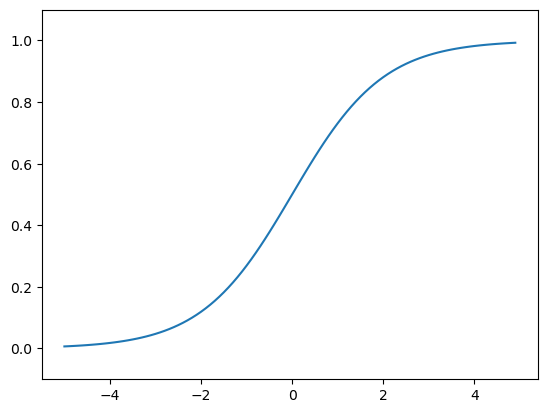

In [5]:
import numpy as np
import matplotlib.pylab as plt

def sigmoid(x):
    return 1 / (1+np.exp(-x))

x = np.arange(-5, 5, 0.1)
y = sigmoid(x)
plt.plot(x, y)
# 指定y轴的范围
plt.ylim(-0.1, 1.1)
plt.show()

阶跃函数和sigmoid函数都是非线性函数。

### ReLU函数

ReLU(Rectified Linear Unit)函数，在输入值大于0时，直接输出该值；在小于等于0的时候，直接输出0。

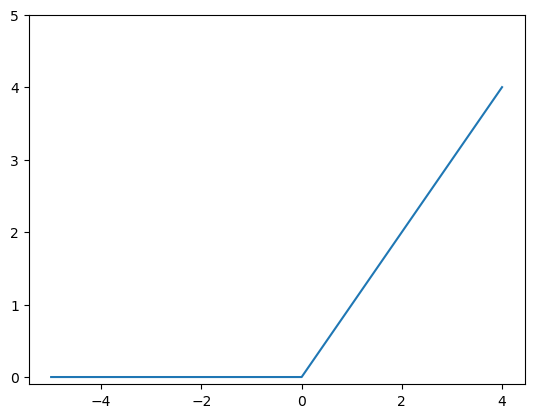

In [10]:
import numpy as np
import matplotlib.pylab as plt

def relu(x):
    # maximum 输出数值较大的一个
    return np.maximum(0, x)

x = np.arange(-5, 5, 1)
y = relu(x)
plt.plot(x, y)
# 指定y轴的范围
plt.ylim(-0.1, 5)
plt.show()

### 恒等函数（identity function）和softmax函数

恒等函数和softmax函数常用作输出层的激活函数
* 恒等函数：将输入，原样输出
* softmax函数如以下公式，softmax函数输出是0-1之间的实数，并且输出值的总和为1。因为有了这个性质，可以把softmax函数输出解释为“概率”

$y_{_k}=\frac{exp(a_{_k})}{\sum_{i=1}^N{exp(a_{_i})}}$

**公式解释：** 计算k个神经元的输出 $y_{_k}$，分子是输入信号$a_{_k}$的指数函数，分母是所有输入信号的指数函数的和。

一般而言，回归问题用恒等函数，分类问题用softmax函数。分类问题，比如区分一下图片里是男人还是女人。回归问题，跟据某个输入，去预测一个数值的问题。

#### softmax 函数代码与性能问题

```python
def softmax(a):
    exp_a=np.exp(a)
    sum_exp_a=np.sum(exp_a)
    y=exp_a/sum_exp_a
    
    return y
```

**注意性能问题**
因为a有可能会非常大，数值容易溢出。

将公式推理
$$y_{_k}=\frac{exp(a_{_k})}{\sum_{i=1}^N{exp(a_{_i})}}=\frac{\mathcal{C}\times exp(a_{_k})}{\mathcal{C}\times\sum_{i=1}^N{exp(a_{_i})}}=\frac{exp(a_{_k}+ log\mathcal{C})}{\sum_{i=1}^N{exp(a_{_i}+ log\mathcal{C})}}=\frac{exp(a_{_k}+ \mathcal{C})}{\sum_{i=1}^N{exp(a_{_i}+ \mathcal{C})}}$$


代码改进
```python
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a -c) #溢出对策
    sum_exp_a = np.sum(exp_a)
    y=exp_a/sum_exp_a
    
    return y

```


## 多维数组的运算

### 多维数组的乘法

* 多维数组A乘以多维数组B：A的行乘以B的列
* A是3X2的多维数组，B是2X4的多维数组，他们相乘得到多维数组C 3X4。A的首位3是C的首位，B的末位4是C的末位4。A的末位2和B的首位2必须相同，否则无法计算。

## 3层神经网络

### 符号确认

$\mathcal{w} ^{(1)}_{1 2}$

* 右上角是代表这是第几层，比如这里代表第几层的权重
* 右下角的第一个数字，代表后一层的第几个神经元，比如这个代表后一层的第1个神经元
* 右下角的第二个数字，代表前一层的第几个神经元，日入这个代表前一层的第2个神经元
* 偏置神经元的右下角**索引号只有1个**，前一层的偏置神经元只有一个。--具体参考书中P58的图。

## 手写数字识别

In [3]:
import sys, os
from dataset.mnist import load_mnist

(x_train, t_train),(x_test, t_test) = load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)


Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [5]:
import sys, os
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img= Image.fromarray(np.uint8(img))
    pil_img.show()

# (训练图像，训练标签), (测试图像，测试标签)
(x_train, t_train),(x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img =img.reshape(28, 28)
print(img.shape)

img_show(img)

5
(784,)
(28, 28)
